In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import glob

In [8]:
# Open the file in binary read mode
with open("xzslice.00001", "rb") as fp:
    # Read nx and ny as integers (4 bytes each)
    nx = np.frombuffer(fp.read(4), dtype=np.int32)[0]
    ny = np.frombuffer(fp.read(4), dtype=np.int32)[0]

    # Read nx * ny floats (4 bytes each)
    den = np.frombuffer(fp.read(4 * nx * ny), dtype=np.float32)

# Reshape the array to a 2D array for better manipulation
den = den.reshape((nx, ny))

# Convert to a pandas DataFrame for easier handling
df = pd.DataFrame(den)

#print(f'nx: {nx}, ny: {ny}')
#print(df)

/opt/ohpc/pub/python/3.11.2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


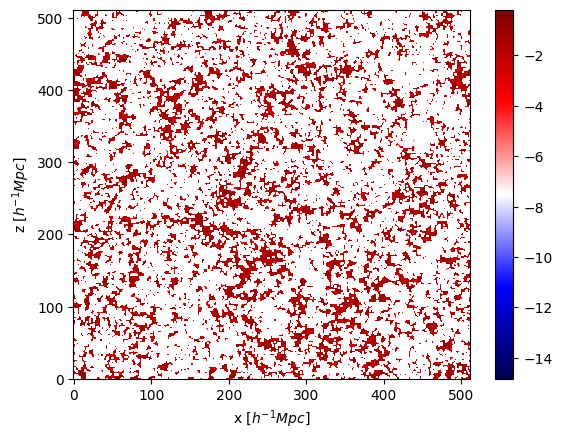

In [19]:
plt.imshow(df, cmap='seismic', aspect='auto', origin = 'lower')
plt.xlabel('x [$h^{-1} Mpc$]')
plt.ylabel('z [$h^{-1} Mpc$]')
plt.colorbar()
plt.show()

In [8]:
# Function to read data from a single file
def read_data(filename):
    with open(filename, "rb") as fp:
        nx = np.frombuffer(fp.read(4), dtype=np.int32)[0]
        ny = np.frombuffer(fp.read(4), dtype=np.int32)[0]
        den = np.frombuffer(fp.read(4 * nx * ny), dtype=np.float32)
    return nx, ny, den.reshape((nx, ny))

# Use glob to find all files matching the pattern
file_pattern = "xzslice.?????"  # Adjust the pattern as needed
files = sorted(glob.glob(file_pattern))

# Read data from all files
frames = []
for filename in files:
    nx, ny, data = read_data(filename)
    frames.append(data)
redshift = np.arange(47,-0.1,-0.1)

In [11]:
print(len(files))

471


In [12]:
print(len(frames))

471


In [4]:

print(len(redshift))

471


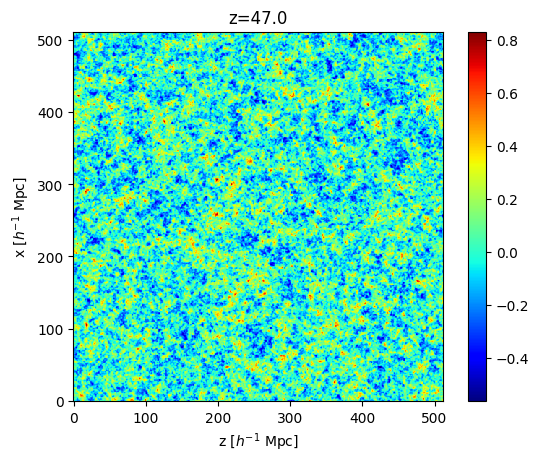

In [9]:
# Create a figure and axis
fig, ax = plt.subplots()
cax = ax.matshow(frames[0], cmap='jet', origin='lower')
ax.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)

# Function to update the plot for each frame
def update(i):
    cax.set_data(frames[i])
    ax.set_title(r'z=%.1f'%(redshift[i]))
    return cax,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(frames), blit=True)

# Display the animation
plt.colorbar(cax)
plt.xlabel('z [$h^{-1}$ Mpc]')
plt.ylabel('x [$h^{-1}$ Mpc]')
plt.show()

In [10]:
ani.save('web.gif',writer='ffmpeg',fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.
